In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
cardf=pd.read_csv("car_age_price.csv")
cardf

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
cardf.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
cardf.shape

(112, 2)

In [5]:
cardf.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
cardf.isnull().sum()

Year     0
Price    0
dtype: int64

In [8]:
## Data visualization/Outlier detection using boxplot
#lowerfence=Q1-(1.5*IQR),Q1 is 25th percentile
#upperfence=Q3+(1.5*IQR),Q3 is 75th percentile
#IQR=Q3-Q1

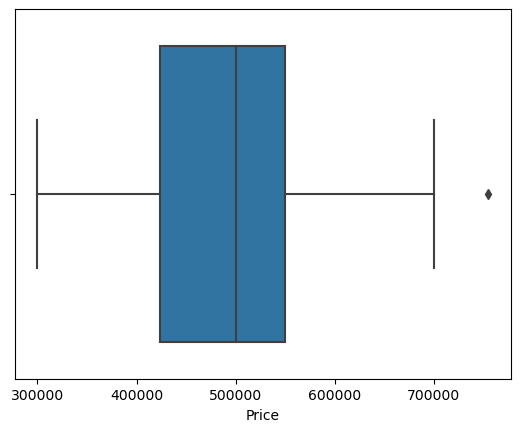

In [9]:
sns.boxplot(x=cardf.Price)
plt.show()

In [11]:

Q1=cardf.Price.quantile(0.25)
Q3=cardf.Price.quantile(0.75)
IQR=stats.iqr(cardf.Price,interpolation='midpoint')
IQR

127500.0

In [12]:
lowerfence=Q1-1.5*IQR
upperfence=Q3+1.5*IQR
print(lowerfence)
print(upperfence)

232500.0
741250.0


In [13]:
cardf.loc[cardf.Price<lowerfence]

,Year,Price


In [14]:
cardf.loc[cardf.Price>upperfence]

,Year,Price
1,2019,755000


In [15]:
cardf.loc[cardf.Price>upperfence,'Price']=np.median(cardf.Price)
cardf.loc[cardf.Price>upperfence]

,Year,Price


# Regression Analysis

#Linear regression


In [16]:
cardf.head()

,Year,Price
0,2018,465000
1,2019,500000
2,2019,700000
3,2018,465000
4,2018,465000


In [17]:
corr_mat=cardf.corr()
corr_mat

,Year,Price
Year,1.000000,0.771779
Price,0.771779,1.000000


In [18]:
#classifying predictor and target
x=cardf.drop(['Price'],axis=1)
y=cardf['Price']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [21]:
model=lr.fit(x_train,y_train)

In [22]:
predictions=model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
print("mean squared error=",mean_squared_error(y_test,predictions))
print("R squared value=",r2_score(y_test,predictions))

mean squared error= 3881491312.3659024
R squared value= 0.4326935668227986


# Lasso Regression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import metrics

In [46]:
#Cars=pd.read_csv("car_age_price.csv")

In [64]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [57]:
x=cardf.drop(['Price'],axis=1)
y=cardf['Price']

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [66]:
Lasso_reg_model=Lasso()

In [67]:
Lasso_reg_model.fit(x_train,y_train)

Lasso()

In [68]:
training_data_pred=Lasso_reg_model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score

In [69]:
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
error_score=metrics.r2_score(y_test,training_data_pred)
print("mean squared error=",mean_squared_error(y_test,predictions))
print("R squared value=",r2_score(y_test,predictions))

mean squared error= 3881491312.3659024
R squared value= 0.4326935668227986


In [79]:
#predictions in 2022
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import metrics


In [82]:
x=cardf.drop(['Price'],axis=1)
y=cardf['Price']
predictions

array([590889.61984804, 501431.74734595, 546160.683597  , 546160.683597  ,
       546160.683597  , 411973.87484388, 501431.74734595, 546160.683597  ,
       590889.61984804, 590889.61984804, 322516.00234179, 501431.74734595,
       411973.87484388, 635618.55609909, 546160.683597  , 590889.61984804,
       322516.00234179, 411973.87484388, 501431.74734595, 501431.74734595,
       501431.74734595, 501431.74734595, 501431.74734595])

In [87]:
print('slope:%.2f' %lasso.coef_[0])

NameError: name 'lasso' is not defined

In [85]:
print('intercept:%.2f'%lasso.intercept_)

NameError: name 'lasso' is not defined

In [86]:
def myfunc(x):
    return slope*x+intercept
price=myfunc(2022)
price

NameError: name 'slope' is not defined